In [1]:
 # Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Drop unnecessary or high-missing-value columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [4]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [5]:
# Encode categorical features
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [13]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.8257    0.8571    0.8411       105
           1     0.7857    0.7432    0.7639        74

    accuracy                         0.8101       179
   macro avg     0.8057    0.8002    0.8025       179
weighted avg     0.8092    0.8101    0.8092       179


=== Decision Tree ===
              precision    recall  f1-score   support

           0     0.8300    0.7905    0.8098       105
           1     0.7215    0.7703    0.7451        74

    accuracy                         0.7821       179
   macro avg     0.7758    0.7804    0.7774       179
weighted avg     0.7852    0.7821    0.7830       179


=== Random Forest ===
              precision    recall  f1-score   support

           0     0.8288    0.8762    0.8519       105
           1     0.8088    0.7432    0.7746        74

    accuracy                         0.8212       179
   macro avg     0.8188    0.8097    0.8132       179

Logistic Regression:-

Accuracy:     81.01%

F1-Score 0:   84.11% (not survived)

F1-Score 1:   76.39% (survived)

Very good overall accuracy.

It performs better at predicting those who did not survive.

Precision and recall are fairly balanced.

Logistic regression is simple, interpretable, and working well.

Decision Tree:-

Accuracy:     78.21%

F1-Score 0:   80.98%

F1-Score 1:   74.51%

Slightly lower accuracy than Logistic Regression.

Recall for class 0 is slightly lower → misses more non-survivors.

Decision trees tend to overfit unless pruned (max_depth, etc.).

Still performs well — and easy to visualize.

Random Forest:-

Accuracy:     82.12%

F1-Score 0:   85.19%

F1-Score 1:   77.46%

Best overall accuracy of the three.

Higher precision and recall for non-survivors (class 0).

Also solid for survivors (class 1) — the most balanced model.

Random Forest is less likely to overfit and handles noisy data better.

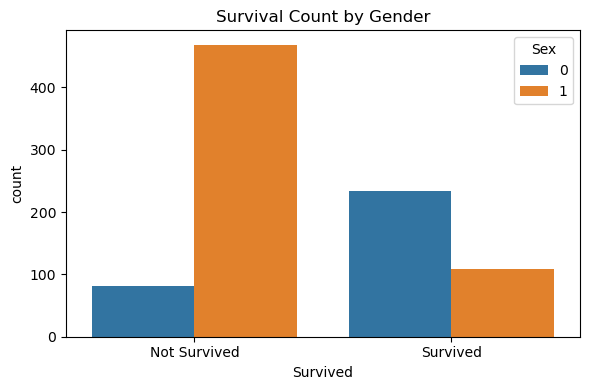

In [14]:
#  EDA - Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Survived", hue="Sex")
plt.title("Survival Count by Gender")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

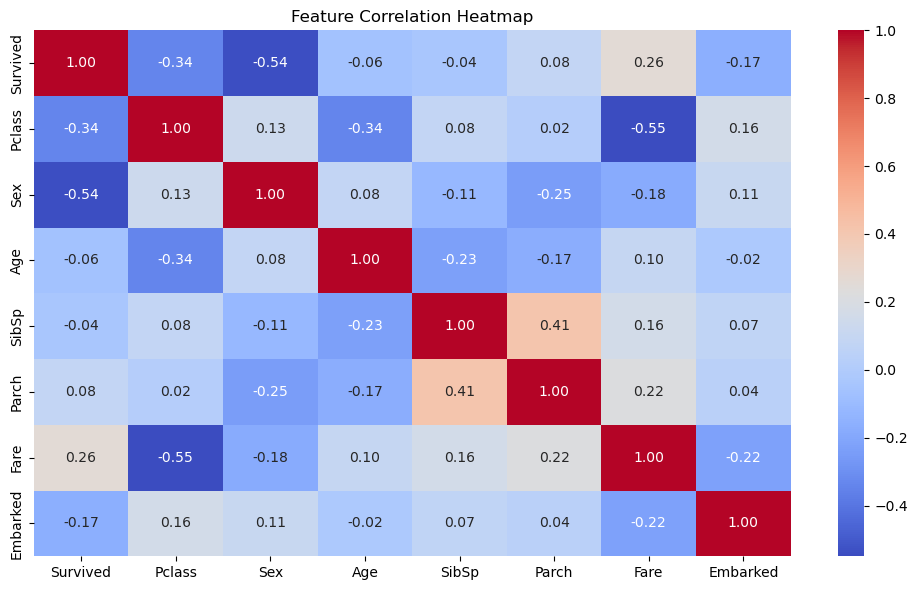

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

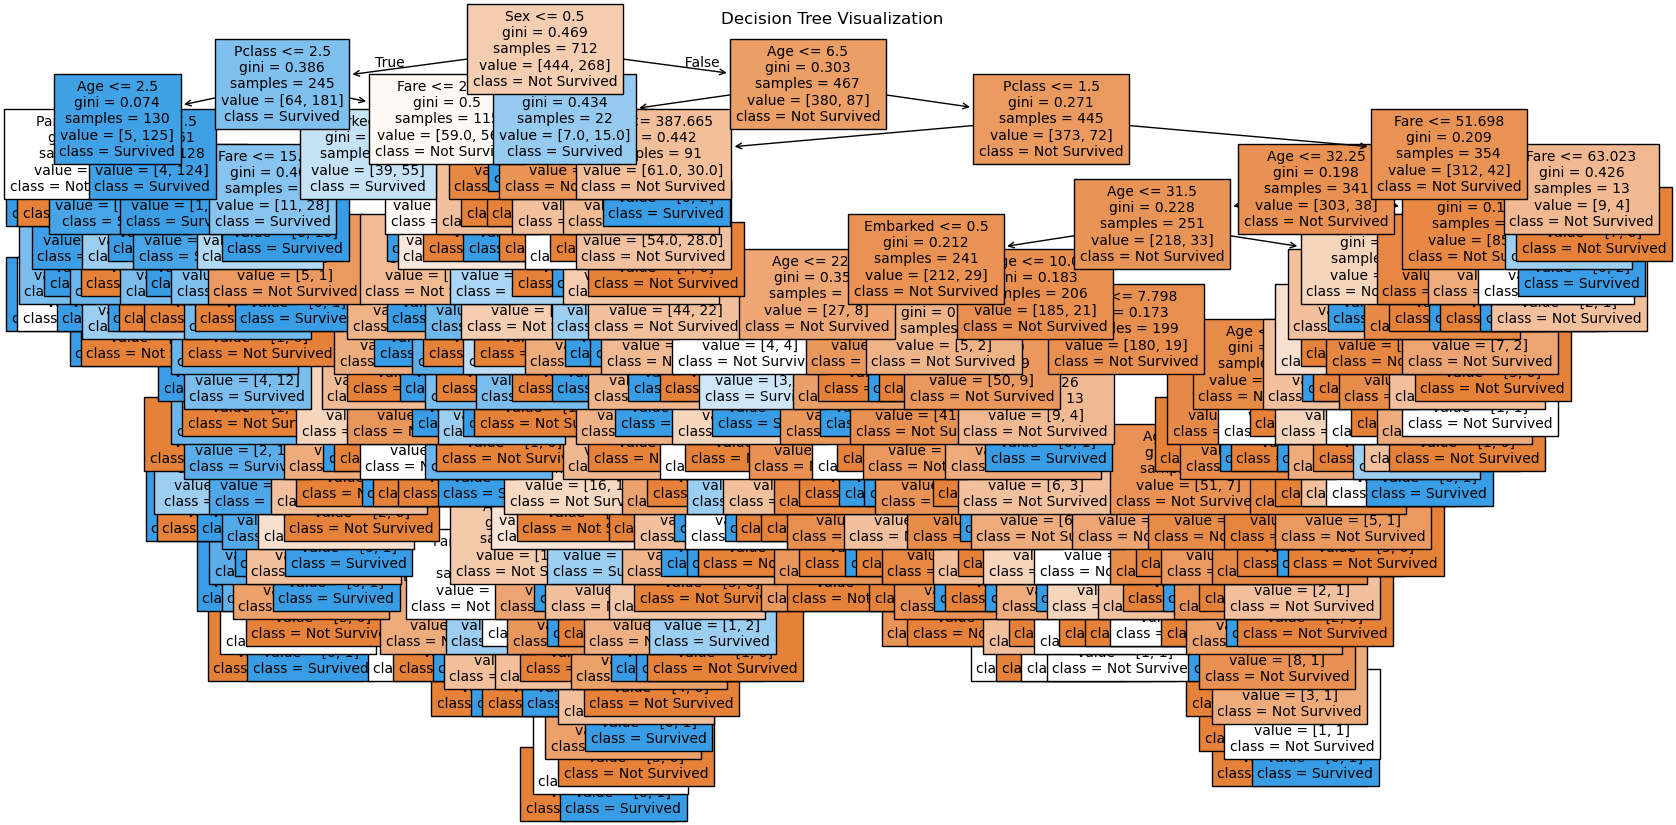

In [16]:
# Decision Tree visualization
plt.figure(figsize=(20, 10))
plot_tree(models["Decision Tree"],
          feature_names=X.columns,
          class_names=["Not Survived", "Survived"],
          filled=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [17]:
print(df.corr()['Survived'].sort_values(ascending=False))

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64
